In [185]:
import pandas as pd
from IPython import display
import shutil
import os
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("../dataset/signDatabasePublicFramesOnly/allAnnotations.csv", sep=";").loc[:, "Filename" : "Occluded,On another road"]

In [15]:
df["Annotation tag"].value_counts()

stop                      1821
pedestrianCrossing        1085
signalAhead                925
speedLimit35               538
speedLimit25               349
keepRight                  331
addedLane                  294
merge                      266
yield                      236
laneEnds                   210
stopAhead                  168
speedLimit45               141
speedLimit30               140
school                     133
speedLimitUrdbl            132
schoolSpeedLimit25         105
turnRight                   92
rightLaneMustTurn           77
speedLimit65                74
speedLimit40                73
truckSpeedLimit55           60
yieldAhead                  57
roundabout                  53
curveRight                  50
speedLimit50                48
noLeftTurn                  47
curveLeft                   37
dip                         35
slow                        34
turnLeft                    32
rampSpeedAdvisory45         29
noRightTurn                 26
doNotEnt

In [4]:
## SELECIONA APENAS AS PLACAS STOP E SPEED LIMIT
# df_process = df.loc[(df["Annotation tag"] == "stop") | (df["Annotation tag"].str.contains("speedLimit"))]

In [17]:
df["Annotation tag"].unique()

array(['stop', 'speedLimitUrdbl', 'speedLimit25', 'pedestrianCrossing',
       'speedLimit35', 'turnLeft', 'slow', 'speedLimit15', 'speedLimit45',
       'rightLaneMustTurn', 'signalAhead', 'keepRight', 'laneEnds',
       'school', 'merge', 'addedLane', 'rampSpeedAdvisory40',
       'rampSpeedAdvisory45', 'curveRight', 'speedLimit65',
       'truckSpeedLimit55', 'thruMergeLeft', 'speedLimit30', 'stopAhead',
       'yield', 'thruMergeRight', 'dip', 'schoolSpeedLimit25',
       'thruTrafficMergeLeft', 'noRightTurn', 'rampSpeedAdvisory35',
       'curveLeft', 'rampSpeedAdvisory20', 'noLeftTurn', 'zoneAhead25',
       'zoneAhead45', 'doNotEnter', 'yieldAhead', 'roundabout',
       'turnRight', 'speedLimit50', 'rampSpeedAdvisoryUrdbl',
       'rampSpeedAdvisory50', 'speedLimit40', 'speedLimit55', 'doNotPass',
       'intersection'], dtype=object)

In [6]:
 df_process.iloc[1]

Filename                    aiua120214-0/frameAnnotations-DataLog02142012_...
Annotation tag                                                speedLimitUrdbl
Upper left corner X                                                       425
Upper left corner Y                                                       197
Lower right corner X                                                      438
Lower right corner Y                                                      213
Occluded,On another road                                                  0,0
Name: 1, dtype: object

In [48]:
path = "../dataset/signDatabasePublicFramesOnly/"
img = path+"vid0/frameAnnotations-vid_cmp2.avi_annotations/speedLimit_1323803166.avi_image2.png"
img

'../dataset/signDatabasePublicFramesOnly/vid0/frameAnnotations-vid_cmp2.avi_annotations/speedLimit_1323803166.avi_image2.png'

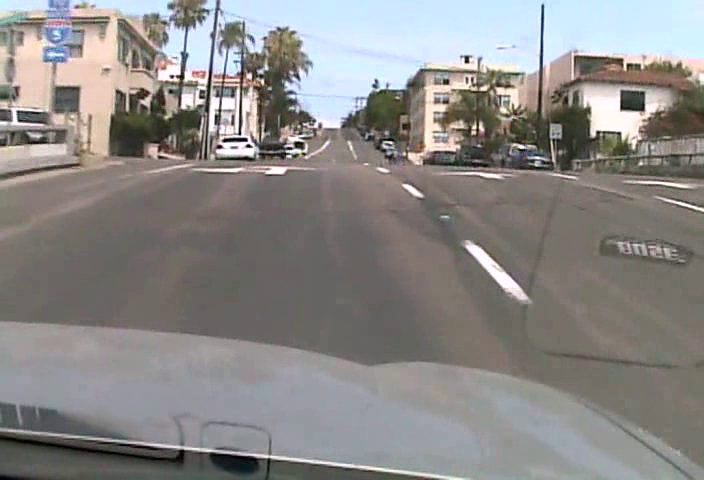

In [49]:
image = display.Image(img)
image

In [9]:
## REMOVE AS PLACAS speedLimitUrdbl
# df_process = df_process.loc[~(df["Annotation tag"] == "speedLimitUrdbl")]

In [10]:
# df_process = df_process.reset_index(drop=True)

In [21]:
## RETIRA OS NUMEROS DAS PLACAS DE SPEED LIMIT
df["Annotation tag"] = df["Annotation tag"].str.replace("\d+", '')
# df["Annotation tag"].str.replace("\d+", '')

In [93]:
df["Annotation tag"] = df["Annotation tag"].str.replace("speedLimitUrdbl", 'speedLimit')
df["Annotation tag"] = df["Annotation tag"].str.replace("schoolSpeedLimit", 'speedLimit')
df["Annotation tag"] = df["Annotation tag"].str.replace("truckSpeedLimit", 'speedLimit')

In [111]:
df["Annotation tag"] = df["Annotation tag"].str.replace("turnRight", 'turn')
df["Annotation tag"] = df["Annotation tag"].str.replace("noLeftTurn", 'turn')
df["Annotation tag"] = df["Annotation tag"].str.replace("curveRight", 'turn')
df["Annotation tag"] = df["Annotation tag"].str.replace("curveLeft", 'turn')
df["Annotation tag"] = df["Annotation tag"].str.replace("turnLeft", 'turn')
df["Annotation tag"] = df["Annotation tag"].str.replace("noRightTurn", 'turn')

In [112]:
df["Annotation tag"].value_counts()

stop                      1821
speedLimit                1673
pedestrianCrossing        1085
signalAhead                925
keepRight                  331
addedLane                  294
turn                       284
merge                      266
yield                      236
laneEnds                   210
stopAhead                  168
school                     133
rightLaneMustTurn           77
rampSpeedAdvisory           64
yieldAhead                  57
roundabout                  53
zoneAhead                   41
dip                         35
slow                        34
doNotEnter                  23
thruTrafficMergeLeft        19
doNotPass                    9
thruMergeRight               7
thruMergeLeft                5
rampSpeedAdvisoryUrdbl       3
intersection                 2
Name: Annotation tag, dtype: int64

In [127]:
df["Annotation tag"].value_counts().loc[df["Annotation tag"].value_counts() > 200]

stop                  1821
speedLimit            1673
pedestrianCrossing    1085
signalAhead            925
keepRight              331
addedLane              294
turn                   284
merge                  266
yield                  236
laneEnds               210
Name: Annotation tag, dtype: int64

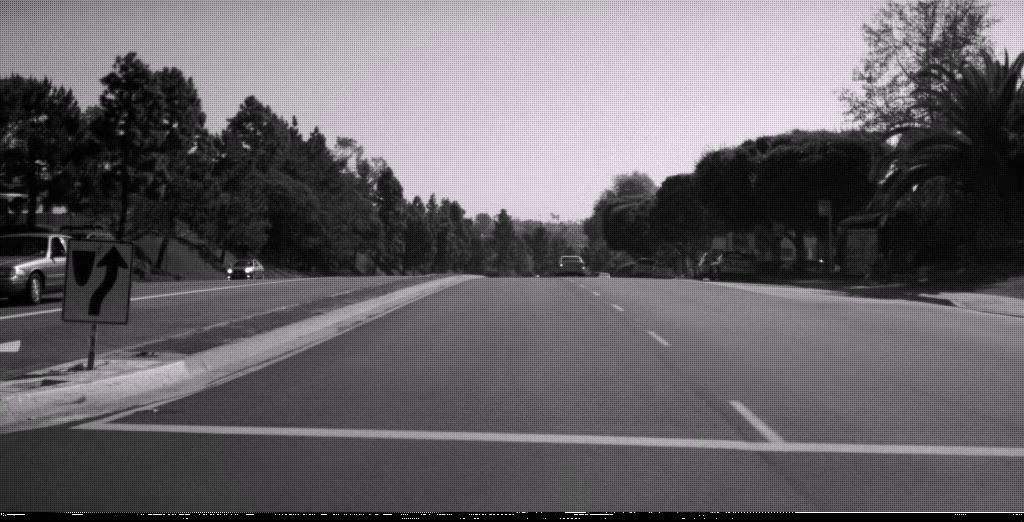

In [140]:
img_name = df.loc[df["Annotation tag"] == "keepRight"]["Filename"].iloc[30]
path = "../dataset/signDatabasePublicFramesOnly/"
img = path+img_name
img

image = display.Image(img)
image

In [141]:
itens = ["stop", "speedLimit", "pedestrianCrossing", "signalAhead", "keepRight", "addedLane", "turn", "merge", "yield", "laneEnds"]

In [143]:
## CORRIGE COLUNA OCCLUDED E REMOVE A COLUNA "Occluded,On another road"
df["Occluded"] = df["Occluded,On another road"].str.split(',').apply(lambda x : x[0])
df = df.drop("Occluded,On another road", axis=1)

In [144]:
df["tag"] = df["Annotation tag"]

In [176]:
df_to_train = df[["Filename", "Annotation tag", "tag"]]

In [177]:
df.shape

(7855, 8)

In [178]:
df_to_train = df_to_train.loc[df_to_train["tag"].isin(itens)]

In [179]:
df_to_train["tag"]

0             stop
1       speedLimit
2             stop
3       speedLimit
4       speedLimit
           ...    
7850    speedLimit
7851    speedLimit
7852    speedLimit
7853    speedLimit
7854    speedLimit
Name: tag, Length: 7125, dtype: object

In [180]:
X = df_to_train.drop(columns=["tag"])
y = df_to_train["tag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345)

In [189]:
# COPIA OS ARQUIVOS PARA A PASTA DE TREINO E TEST
train_folder = "../dataset/Train"
test_folder = "../dataset/Test"

for tag in df_to_train["tag"].unique():
#     print(train_folder+"/"+tag)
    os.makedirs(test_folder+"/"+tag, exist_ok=True)
    
for tag in df_to_train["tag"].unique():
#     print(train_folder+"/"+tag)
    os.makedirs(train_folder+"/"+tag, exist_ok=True)

for filename, tag in zip(X_train["Filename"], X_train["Annotation tag"]):
# #     print(filename, tag)
    shutil.copy(path+filename, train_folder+"/"+tag)
    
for filename, tag in zip(X_test["Filename"], X_test["Annotation tag"]):
    shutil.copy(path+filename, test_folder+"/"+tag)

In [29]:
# !pip install Keras
# !pip install tensorflow

In [190]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image


In [191]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

In [192]:
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

In [193]:
classificador.add(Flatten())

In [214]:
classificador.add(Dense(units = 1024, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 512, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 256, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, activation = 'softmax'))

In [215]:
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [216]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

In [217]:
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [218]:
base_treinamento = gerador_treinamento.flow_from_directory('../dataset/Train', target_size = (64, 64))

Found 5265 images belonging to 10 classes.


In [219]:
base_teste = gerador_teste.flow_from_directory('../dataset/Test', target_size = (64, 64))


Found 1399 images belonging to 10 classes.


In [220]:
classificador.fit(base_treinamento, steps_per_epoch = 70, epochs = 10, validation_data = base_teste, validation_steps = 135)

Epoch 1/10
70/70 [==============================] - 52s 706ms/step - loss: 2.0964 - accuracy: 0.2154
Epoch 2/10
70/70 [==============================] - 52s 746ms/step - loss: 1.9755 - accuracy: 0.3041
Epoch 3/10
70/70 [==============================] - 64s 914ms/step - loss: 1.9903 - accuracy: 0.2942
Epoch 4/10
70/70 [==============================] - 55s 780ms/step - loss: 1.9738 - accuracy: 0.3054
Epoch 5/10
70/70 [==============================] - 55s 783ms/step - loss: 1.9497 - accuracy: 0.3265
Epoch 6/10
70/70 [==============================] - 55s 779ms/step - loss: 1.9885 - accuracy: 0.2826
Epoch 7/10
70/70 [==============================] - 47s 676ms/step - loss: 1.9752 - accuracy: 0.2855
Epoch 8/10
70/70 [==============================] - 52s 744ms/step - loss: 1.9617 - accuracy: 0.3148
Epoch 9/10
70/70 [==============================] - 54s 770ms/step - loss: 1.9530 - accuracy: 0.3176
Epoch 10/10
70/70 [==============================] - 80s 1s/step - loss: 1.9834 - accuracy:

In [221]:
classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0